<a href="https://colab.research.google.com/github/IevgenTs/uoft-ml-3253-assignments/blob/main/module-06-svm/module_06_svm_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment for Module 6

In this assignment you will continue working with the housing price per district from the previous module assignment, this time training SVM models, both for regression and classification.

#### Getting the data for the assignment (similar to the notebook from chapter 2 of Hands-On...)

In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()

### Fix the categories in the categorical variable

In [ ]:
d = {'<1H OCEAN':'LESS_1H_OCEAN', 'INLAND':'INLAND', 'ISLAND':'ISLAND', 'NEAR BAY':'NEAR_BAY', 'NEAR OCEAN':'NEAR_OCEAN'}
housing['ocean_proximity'] = housing['ocean_proximity'].map(lambda s: d[s])

### Add 2 more features

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Fix missing data

In [ ]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

<ipython-input-7-11ec5b3165b1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


### Create dummy variables based on the categorical variable

In [ ]:
one_hot = pd.get_dummies(housing['ocean_proximity'])
housing = housing.drop('ocean_proximity', axis=1)
housing = housing.join(one_hot)

### Check the data

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_household       20640 non-null  float64
 10  population_per_household  20640 non-null  float64
 11  INLAND                    20640 non-null  bool   
 12  ISLAND                    20640 non-null  bool   
 13  LESS_1H_OCEAN             20640 non-null  bool   
 14  NEAR_B

### Partition into train and test

Use train_test_split from sklearn.model_selection to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.3, random_state=42)

### Features

In [ ]:
target = 'median_house_value'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [ ]:
X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]

### Scaling features

Similarly, use StandardScaler from sklearn.preprocessing to normalize the training and testing data, using the training data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

#### Comparing models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

### Linear regression on original features (no transformations) --- benchmark

In [ ]:
from sklearn.linear_model import LinearRegression
lin_scores = cross_val_score(LinearRegression(), train_set[features], train_set[target], scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70142.55721218 67456.39127204 67318.3258893  70866.26065275]
Mean: 68945.8837565685


### 1. Support Vector Machines for Regression

#### (a) In this exercise your goal is to tune SVR with FBR kernel, and make the average score mean_squared_error over 3-folds (cv=3) below 58000.

You are encouraged to try optimizing any of the hyper-parameters of SVR

See http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html for more details

However, as a hint, you can focus on C and gamma.

Hint 2: if when you try different values for a hyper-parameter, the optimal models corresponds to one of the extreme values in your range, that probably means you can keep improving your solution by considering values beyond the current range.



In [ ]:
from sklearn.svm import SVR

# Define parameter grid for SVR tuning
# C_vals = [0.1, 1, 10, 100, 1000]  # Regularization parameter
# gamma_vals = [0.001, 0.01, 0.1, 1, 10]  # RBF kernel coefficient

# C_vals = [100, 10000, 100000]  # Regularization parameter
# gamma_vals = [ 0.01, 0.1, 10]  # RBF kernel coefficient

C_vals = [100, 1000, 3000000]  # Regularization parameter
gamma_vals = [0.02, 0.03, 0.04]  # RBF kernel coefficient


param_grid = [{'C':C_vals, 'gamma':gamma_vals}]
grid_search_rbf = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3,scoring='neg_mean_squared_error')
grid_search_rbf.fit(X_tr, np.ravel(y_tr))

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [100, 1000, 3000000],
                          'gamma': [0.02, 0.03, 0.04]}],
             scoring='neg_mean_squared_error')

In [ ]:
print(grid_search_rbf.best_params_)
print(np.sqrt(-grid_search_rbf.best_score_))

{'C': 3000000, 'gamma': 0.04}
56253.73760731077


### Performance on Test Set

In [ ]:
from sklearn.metrics import mean_squared_error

final_model = grid_search_rbf.best_estimator_   ## THIS SHOULD BE THE BEST GRID_SEARCH ##

y_te_estimation = final_model.predict(X_te)

final_mse = mean_squared_error(y_te, y_te_estimation)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

55230.29957680099


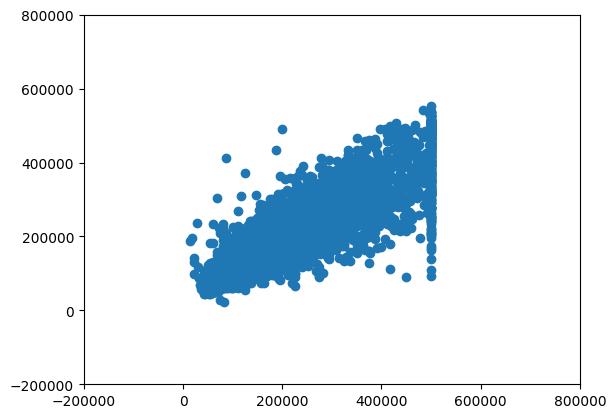

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=y_te, y=y_te_estimation)
plt.xlim([-200000,800000])
plt.ylim([-200000,800000])
plt.show()

### 2. SVM for Classification

Now we transform the continuous target into a binary variable, indicating whether or not the price is above the average $179700


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
np.median(housing[['median_house_value']])

179700.0

#### Binary target variable

In [ ]:
y_tr_b = 1*np.ravel(y_tr>=179700.0)
y_te_b = 1*np.ravel(y_te>=179700.0)

#### Linear SVM for classification

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_tr, y_tr_b)

LinearSVC(random_state=42)

In [ ]:
y_pred = lin_clf.predict(X_te)
accuracy_score(y_te_b, y_pred)

0.8624031007751938

### (a) Does SVC (with default hyper-parameters) improve the performance of the linear SVM?

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Train SVC with default hyperparameters (RBF kernel by default)
svc_clf = SVC(random_state=42)
svc_clf.fit(X_tr, y_tr_b)

SVC(random_state=42)

In [ ]:
y_pred_cvc = svc_clf.predict(X_tr)
accuracy_score(y_tr_b, y_pred_cvc)

0.866140642303433

In [ ]:
#It seems accuracy score is slightly better for SVC with RBF kernel

### (b) Use randomized search to tune hyper-parameters of SVC and improve its performance

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': uniform(300, 500),
    'gamma': reciprocal(0.01, 0.1)
}

In [ ]:
# Train SVC with RandomizedSearchCV
svc_clf = SVC(random_state=42)
rnd_search = RandomizedSearchCV(svc_clf, param_distributions=param_dist, n_iter=20, cv=4, scoring='accuracy', random_state=42, n_jobs=-1)
rnd_search.fit(X_tr, y_tr_b)

RandomizedSearchCV(cv=4, estimator=SVC(random_state=42), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79ac2a2f9f50>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79ac2dde6510>},
                   random_state=42, scoring='accuracy')

In [ ]:
# Best model evaluation
y_pred_svc = rnd_search.best_estimator_.predict(X_te)
accuracy_svc = accuracy_score(y_te_b, y_pred_svc)

print("Best Parameters:", rnd_search.best_params_)
print("Best Accuracy of SVC (tuned parameters):", accuracy_svc)

Best Parameters: {'C': 329.04180608409973, 'gamma': 0.07348118405270448}
Best Accuracy of SVC (tuned parameters): 0.8767764857881137
